<a href="https://colab.research.google.com/github/earter/Python-class/blob/master/exercises7_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

In [2]:
kn = pd.read_csv('KNN_Project_Data.csv')
kn.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


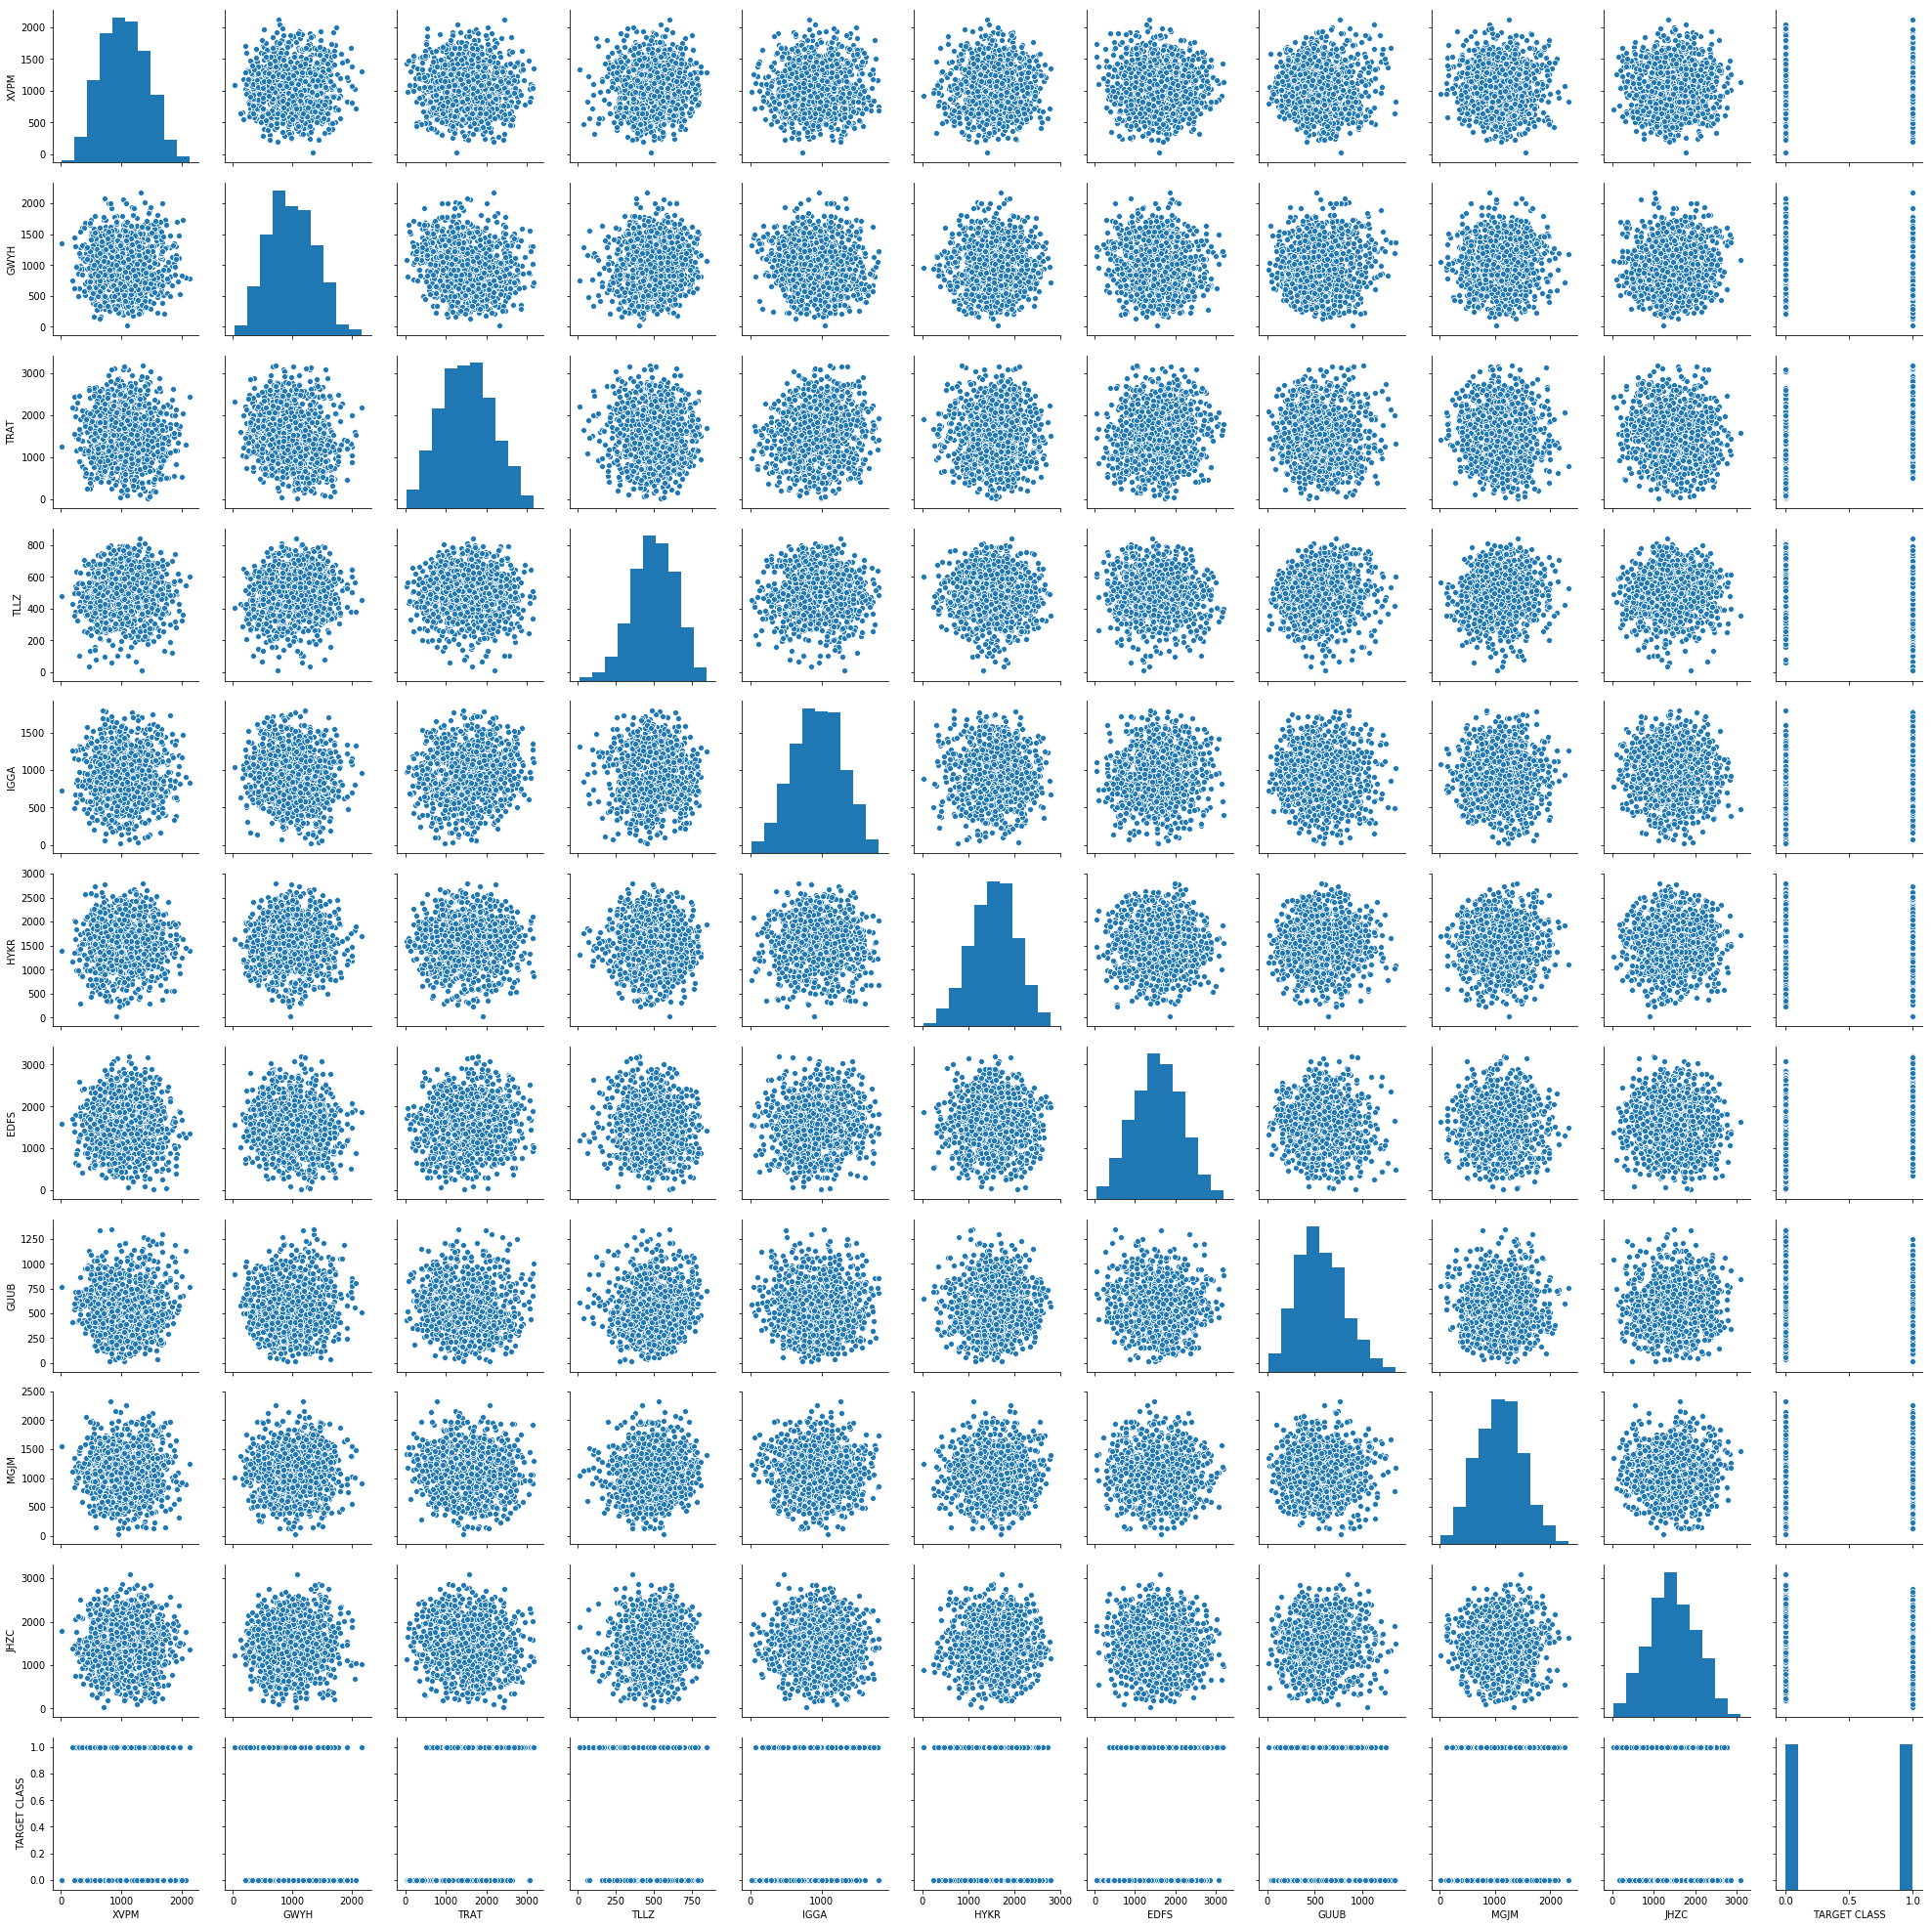

In [6]:
sns.pairplot(kn) # todo , hue='TARGET CLASS')

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(kn.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_features = scaler.transform(kn.drop('TARGET CLASS', axis=1))

In [19]:
pd.DataFrame(scaled_features, columns=kn.columns[:-1]).head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, kn['TARGET CLASS'], test_size=0.3)

In [0]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
y_predict = knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test, y_predict))

[[106  48]
 [ 31 115]]


In [31]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       154
           1       0.71      0.79      0.74       146

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [0]:
# choosing a K value

err_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))


In [35]:
err_rate


[0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333,
 0.2633333333333333]